In [67]:
# Tristan Nguyen
# @author: tristan (NGUYEN VU ANH TRUNG)
# email = "kivanolai@gmail.com"
"""
Problem walkthrough
In this problem, you will build a classifier with loan_status as a binary target. 
In order to achieve that, you should only include loans that are either 'Fully Paid' (your 0’s) or
'Charged Off' (your 1’s).
- Download the dataset from
https://www.kaggle.com/datasets/ethon0426/lending-club-20072020q1
"""


"\nProblem walkthrough\nIn this problem, you will build a classifier with loan_status as a binary target. \nIn order to achieve that, you should only include loans that are either 'Fully Paid' (your 0’s) or\n'Charged Off' (your 1’s).\n- Download the dataset from\nhttps://www.kaggle.com/datasets/ethon0426/lending-club-20072020q1\n"

In [68]:
%pip install numpy
%pip install polars

DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.11/site-packages/python_mnist-0.7-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.11/site-packages/python_mnist-0.7-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


In [69]:
import numpy as np # linear algebra
import polars as pl

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../input/.DS_Store
../input/LCDataDictionary.xlsx
../input/Loan_status_2007-2020Q3.csv
../input/archive/.DS_Store


In [70]:
data_file_path  = "../input/Loan_status_2007-2020Q3.csv"
# Step 1: Load the data
# Load the data
# df = pl.scan_csv(data_file_path)
df = pl.read_csv(data_file_path,infer_schema_length=2000, null_values=["Loans that do not meet the credit policy"])

df.head()


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,…,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
i64,i64,i64,i64,f64,str,str,f64,str,str,str,str,str,f64,str,str,str,str,str,str,str,str,str,f64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,str,…,str,str,str,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
0,1077501,5000,5000,4975.0,""" 36 months""",""" 10.65%""",162.87,"""B""","""B2""",null,"""10+ years""","""RENT""",24000.0,"""Verified""","""Dec-2011""","""Fully Paid""","""n""","""https://lendingclub.com/browse…","""credit_card""","""Computer""","""860xx""","""AZ""",27.65,0,"""Jan-1985""",735,739,1,null,null,3,0,13648,"""83.7%""",9,"""f""",…,null,null,null,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N"""
1,1077430,2500,2500,2500.0,""" 60 months""",""" 15.27%""",59.83,"""C""","""C4""","""Ryder""","""< 1 year""","""RENT""",30000.0,"""Source Verified""","""Dec-2011""","""Charged Off""","""n""","""https://lendingclub.com/browse…","""car""","""bike""","""309xx""","""GA""",1.0,0,"""Apr-1999""",740,744,5,null,null,3,0,1687,"""9.4%""",4,"""f""",…,null,null,null,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N"""
2,1077175,2400,2400,2400.0,""" 36 months""",""" 15.96%""",84.33,"""C""","""C5""",null,"""10+ years""","""RENT""",12252.0,"""Not Verified""","""Dec-2011""","""Fully Paid""","""n""","""https://lendingclub.com/browse…","""small_business""","""real estate business""","""606xx""","""IL""",8.72,0,"""Nov-2001""",735,739,2,null,null,2,0,2956,"""98.5%""",10,"""f""",…,null,null,null,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N"""
3,1076863,10000,10000,10000.0,""" 36 months""",""" 13.49%""",339.31,"""C""","""C1""","""AIR RESOURCES BOARD""","""10+ years""","""RENT""",49200.0,"""Source Verified""","""Dec-2011""","""Fully Paid""","""n""","""https://lendingclub.com/browse…","""other""","""personel""","""917xx""","""CA""",20.0,0,"""Feb-1996""",690,694,1,35,null,10,0,5598,"""21%""",37,"""f""",…,null,null,null,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N"""
4,1075358,3000,3000,3000.0,""" 60 months""",""" 12.69%""",67.79,"""B""","""B5""","""University Medical Group""","""1 year""","""RENT""",80000.0,"""Source Verified""","""Dec-2011""","""Fully Paid""","""n""","""https://lendingclub.com/browse…","""other""","""Personal""","""972xx""","""OR""",17.94,0,"""Jan-1996""",695,699,0,38,null,15,0,27783,"""53.9%""",38,"""f""",…,null,null,n

In [71]:
filtered_df = df.drop_nulls(subset=df.columns)

In [72]:
filtered_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,…,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
i64,i64,i64,i64,f64,str,str,f64,str,str,str,str,str,f64,str,str,str,str,str,str,str,str,str,f64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,str,…,str,str,str,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
12757,118309395,19200,19200,19200.0,""" 60 months""",""" 30.94%""",632.32,"""G""","""G4""","""Admissions coordinator ""","""2 years""","""MORTGAGE""",50000.0,"""Source Verified""","""Sep-2017""","""Current""","""n""","""https://lendingclub.com/browse…","""debt_consolidation""","""Debt consolidation""","""707xx""","""LA""",52.06,0,"""Feb-2005""",660,664,3,57,53,20,1,23041,"""70%""",48,"""w""",…,"""7""","""95.3""","""60""",1,0,"""422550""","""164560""","""24900""","""144179""","""42537""","""585""","""589""","""Feb-2005""","""3""","""2""","""24""","""83.8""","""5""","""19""","""0""","""1""","""Y""","""CVD19SKIP""","""INCOMECURT""","""ACTIVE""","""2""","""0""","""Apr-2020""","""Jun-2020""","""Apr-2020""","""2""","""0""","""ACTIVE""","""718.79""","""14038.19""","""632.32""","""N"""
20811,118325515,24000,24000,24000.0,""" 60 months""",""" 15.05%""",571.59,"""C""","""C4""","""Owner""","""< 1 year""","""RENT""",34000.0,"""Not Verified""","""Sep-2017""","""Late (31-120 days)""","""n""","""https://lendingclub.com/browse…","""debt_consolidation""","""Debt consolidation""","""925xx""","""CA""",35.51,5,"""Apr-1988""",700,704,1,18,111,14,1,2574,"""9.1%""",18,"""w""",…,"""5""","""61.1""","""0""",1,0,"""71152""","""27132""","""19600""","""42852""","""8603""","""655""","""659""","""Apr-1988""","""0""","""0""","""12""","""25.6""","""4""","""11""","""0""","""0""","""N""","""ST0650PV01""","""UNEMPLOYED""","""COMPLETE""","""3""","""571.59""","""Jan-2019""","""Mar-2019""","""Jan-2019""","""3""","""25""","""DELINQUENT""","""645.18111""","""17730.24""","""300.08""","""N"""
21509,119196780,15000,15000,15000.0,""" 60 months""",""" 13.59%""",345.85,"""C""","""C2""","""RN""","""< 1 year""","""MORTGAGE""",50000.0,"""Not Verified""","""Sep-2017""","""Current""","""n""","""https://lendingclub.com/browse…","""credit_card""","""Credit card refinancing""","""062xx""","""CT""",32.36,0,"""Jan-2003""",680,684,1,73,75,13,1,6107,"""38.4%""",42,"""w""",…,"""1""","""96.9""","""50""",1,0,"""244670""","""51909""","""5500""","""66570""","""16060""","""670""","""674""","""Dec-2000""","""2""","""4""","""12""","""45.4""","""2""","""29""","""0""","""0""","""Y""","""CVD19SKIP""","""INCOMECURT""","""ACTIVE""","""2""","""0""","""Apr-2020""","""Jun-2020""","""Apr-2020""","""2""","""0""","""ACTIVE""","""198.31""","""8771.92""","""345.85""","""N"""
22627,118339354,26000,26000,26000.0,""" 36 months""",""" 14.08%""",889.63,"""C""","""C3""","""Teacher""","""7 years""","""MORTGAGE""",65500.0,"""Verified""","""Sep-2017""","""Current""","""n"

In [73]:
# Step 2: Filter the data
filtered_df = df.filter(pl.col("loan_status").is_in(["Fully Paid", "Charged Off"]))


In [74]:
# Assuming filtered_df is already defined
filtered_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,…,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
i64,i64,i64,i64,f64,str,str,f64,str,str,str,str,str,f64,str,str,str,str,str,str,str,str,str,f64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,str,…,str,str,str,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
0,1077501,5000,5000,4975.0,""" 36 months""",""" 10.65%""",162.87,"""B""","""B2""",null,"""10+ years""","""RENT""",24000.0,"""Verified""","""Dec-2011""","""Fully Paid""","""n""","""https://lendingclub.com/browse…","""credit_card""","""Computer""","""860xx""","""AZ""",27.65,0,"""Jan-1985""",735,739,1,null,null,3,0,13648,"""83.7%""",9,"""f""",…,null,null,null,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N"""
1,1077430,2500,2500,2500.0,""" 60 months""",""" 15.27%""",59.83,"""C""","""C4""","""Ryder""","""< 1 year""","""RENT""",30000.0,"""Source Verified""","""Dec-2011""","""Charged Off""","""n""","""https://lendingclub.com/browse…","""car""","""bike""","""309xx""","""GA""",1.0,0,"""Apr-1999""",740,744,5,null,null,3,0,1687,"""9.4%""",4,"""f""",…,null,null,null,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N"""
2,1077175,2400,2400,2400.0,""" 36 months""",""" 15.96%""",84.33,"""C""","""C5""",null,"""10+ years""","""RENT""",12252.0,"""Not Verified""","""Dec-2011""","""Fully Paid""","""n""","""https://lendingclub.com/browse…","""small_business""","""real estate business""","""606xx""","""IL""",8.72,0,"""Nov-2001""",735,739,2,null,null,2,0,2956,"""98.5%""",10,"""f""",…,null,null,null,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N"""
3,1076863,10000,10000,10000.0,""" 36 months""",""" 13.49%""",339.31,"""C""","""C1""","""AIR RESOURCES BOARD""","""10+ years""","""RENT""",49200.0,"""Source Verified""","""Dec-2011""","""Fully Paid""","""n""","""https://lendingclub.com/browse…","""other""","""personel""","""917xx""","""CA""",20.0,0,"""Feb-1996""",690,694,1,35,null,10,0,5598,"""21%""",37,"""f""",…,null,null,null,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N"""
4,1075358,3000,3000,3000.0,""" 60 months""",""" 12.69%""",67.79,"""B""","""B5""","""University Medical Group""","""1 year""","""RENT""",80000.0,"""Source Verified""","""Dec-2011""","""Fully Paid""","""n""","""https://lendingclub.com/browse…","""other""","""Personal""","""972xx""","""OR""",17.94,0,"""Jan-1996""",695,699,0,38,null,15,0,27783,"""53.9%""",38,"""f""",…,null,null,n

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


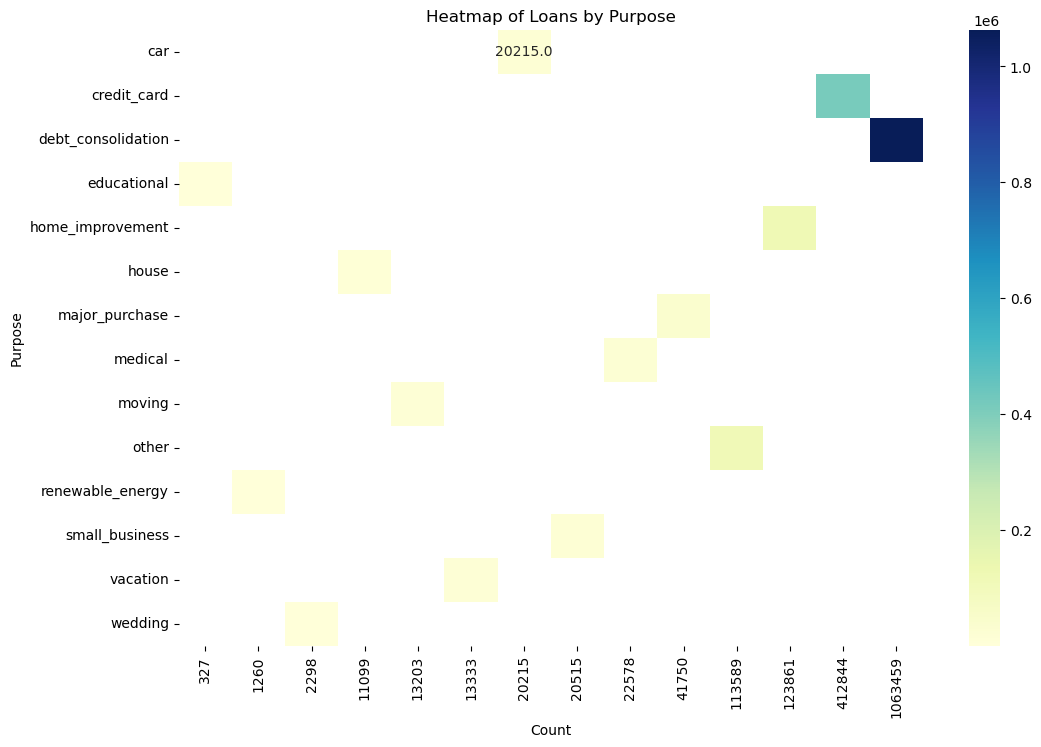

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming filtered_df is already defined and is a Polars DataFrame
# Convert Polars DataFrame to Pandas DataFrame
filtered_df_pd = filtered_df.to_pandas()

# Group by 'purpose' and count the occurrences
purpose_counts = filtered_df_pd.groupby('purpose').size().reset_index(name='count')

# Create a pivot table for the heatmap
heatmap_data = purpose_counts.pivot(index='purpose', columns='count', values='count')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Heatmap of Loans by Purpose')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.show()

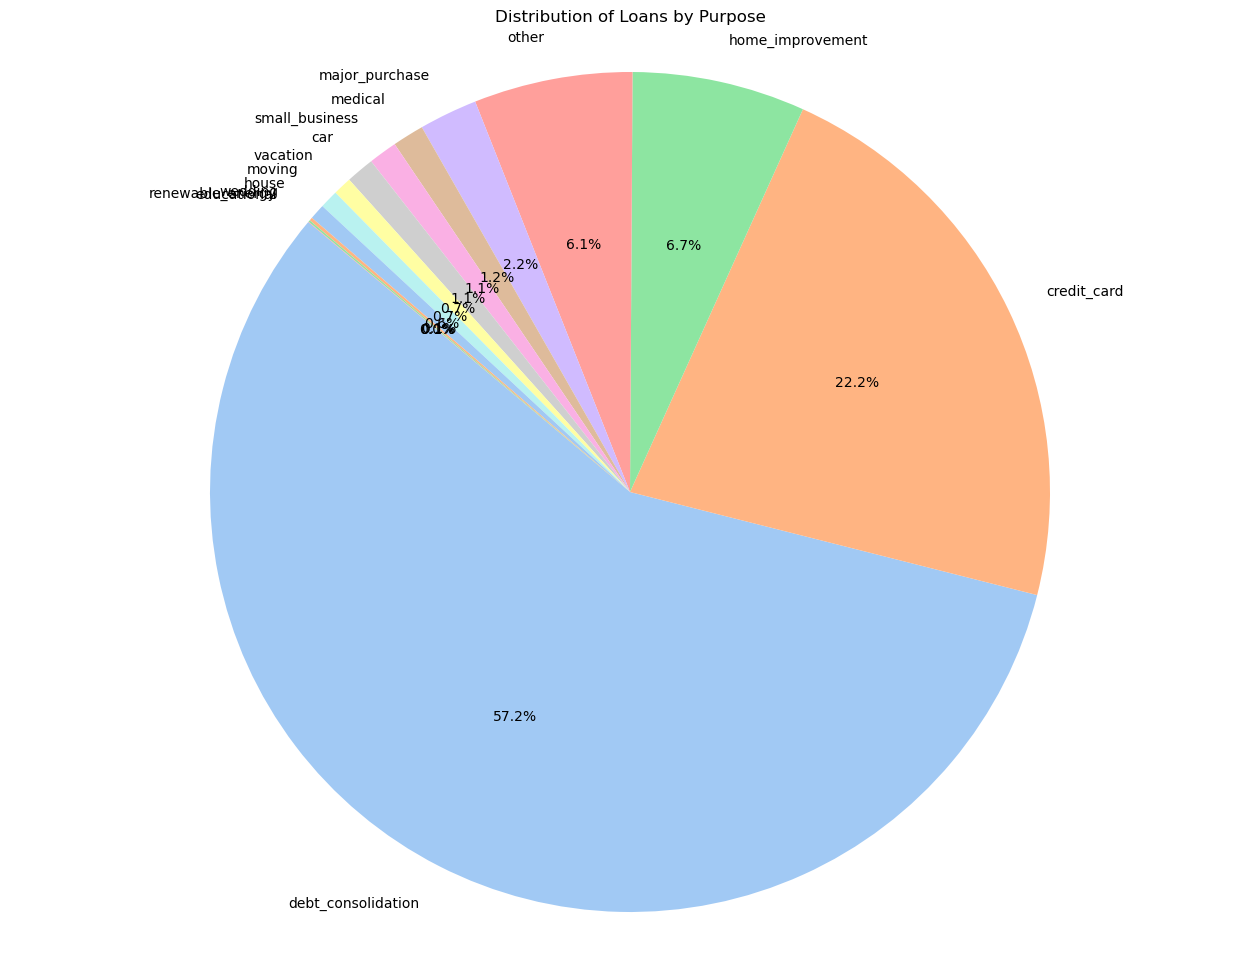

In [76]:
import matplotlib.pyplot as plt

# Assuming filtered_df_pd is already defined and is a Pandas DataFrame
# Group by 'purpose' and count the occurrences
purpose_counts = filtered_df_pd['purpose'].value_counts()

# Create a pie chart
plt.figure(figsize=(16, 12))
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribution of Loans by Purpose')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

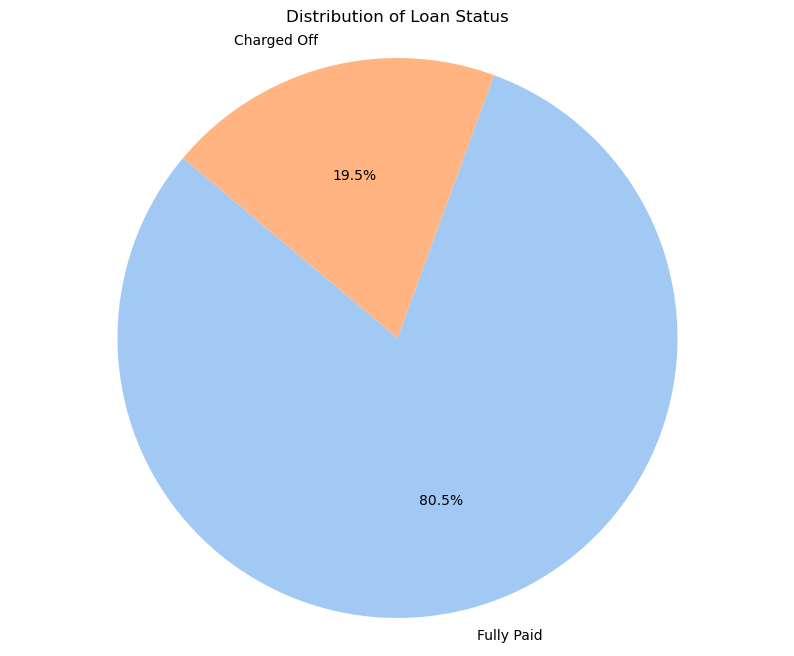

In [77]:
import matplotlib.pyplot as plt

# Assuming filtered_df_pd is already defined and is a Pandas DataFrame
# Group by 'loan_status' and count the occurrences
loan_status_counts = filtered_df_pd['loan_status'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribution of Loan Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [78]:
filtered_df['loan_status'].value_counts()

loan_status,count
str,u32
"""Fully Paid""",1497783
"""Charged Off""",362548


In [79]:
import seaborn as sns
filtered_df['loan_status'].value_counts(normalize=False).plot(kind='bar', color=sns.color_palette("pastel"))

:Bars   [index]   (count)

In [80]:
filtered_df.columns

['',
 'id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'veri

In [81]:
#  drop the grade, sub_grade, interest related
# columns and any other columns you think may cause information leakage.
# List of columns to drop
columns_to_drop = [
    'grade', 
    'sub_grade', 
    'int_rate', 
    'installment', 
    'out_prncp', 
    'out_prncp_inv', 
    'total_pymnt', 
    'total_pymnt_inv', 
    'total_rec_prncp', 
    'total_rec_int', 
    'total_rec_late_fee', 
    'recoveries', 
    'collection_recovery_fee', 
    'last_pymnt_d', 
    'last_pymnt_amnt'
]

droped_filtered_df = filtered_df.drop(columns_to_drop)

droped_filtered_df.columns

['',
 'id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_re

In [82]:
import polars as pl

# Assuming droped_filtered_df is already defined
# If not, load your dataset and drop the necessary columns as shown previously

# Summary statistics for the 'funded_amnt' column
summary_stats = droped_filtered_df.select([
    pl.col('funded_amnt').mean().alias('mean_funded_amnt'),
    pl.col('funded_amnt').median().alias('median_funded_amnt'),
    pl.col('funded_amnt').std().alias('std_funded_amnt'),
    pl.col('funded_amnt').min().alias('min_funded_amnt'),
    pl.col('funded_amnt').max().alias('max_funded_amnt')
])

print("Summary Statistics for 'funded_amnt':")
print(summary_stats)

# Group by 'funded_amnt' and count the number of occurrences
grouped_funded_amnt = droped_filtered_df.group_by('funded_amnt').agg([
    pl.len().alias('count')
])

print("Grouped by 'funded_amnt':")
print(grouped_funded_amnt)



Summary Statistics for 'funded_amnt':
shape: (1, 5)
┌──────────────────┬────────────────────┬─────────────────┬─────────────────┬─────────────────┐
│ mean_funded_amnt ┆ median_funded_amnt ┆ std_funded_amnt ┆ min_funded_amnt ┆ max_funded_amnt │
│ ---              ┆ ---                ┆ ---             ┆ ---             ┆ ---             │
│ f64              ┆ f64                ┆ f64             ┆ i64             ┆ i64             │
╞══════════════════╪════════════════════╪═════════════════╪═════════════════╪═════════════════╡
│ 14582.177231     ┆ 12000.0            ┆ 8967.822906     ┆ 500             ┆ 40000           │
└──────────────────┴────────────────────┴─────────────────┴─────────────────┴─────────────────┘
Grouped by 'funded_amnt':
shape: (1_568, 2)
┌─────────────┬───────┐
│ funded_amnt ┆ count │
│ ---         ┆ ---   │
│ i64         ┆ u32   │
╞═════════════╪═══════╡
│ 14425       ┆ 180   │
│ 13925       ┆ 329   │
│ 33325       ┆ 37    │
│ 36975       ┆ 10    │
│ 2775        ┆ 

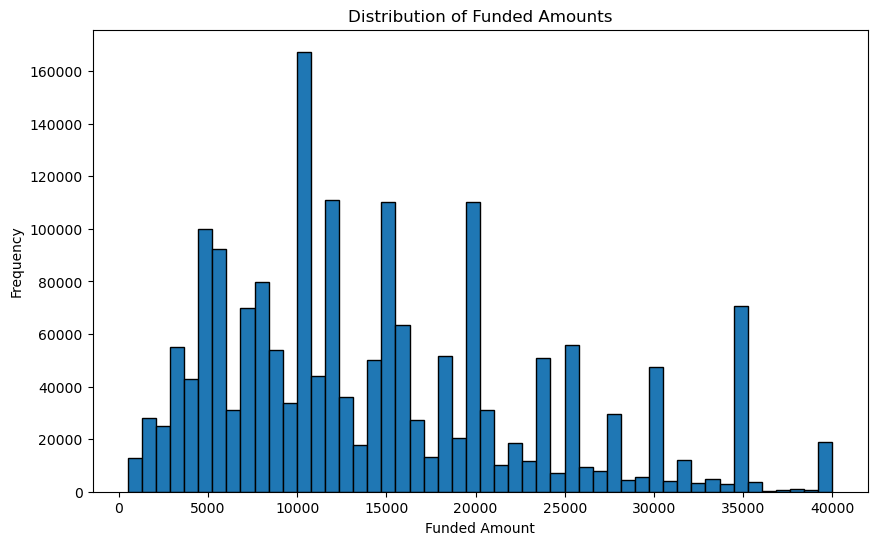

In [83]:
# Visualize the distribution of 'funded_amnt' values
import matplotlib.pyplot as plt

funded_amnt_pd = droped_filtered_df.select('funded_amnt')


plt.figure(figsize=(10, 6))
plt.hist(funded_amnt_pd['funded_amnt'], bins=50, edgecolor='k')
plt.title('Distribution of Funded Amounts')
plt.xlabel('Funded Amount')
plt.ylabel('Frequency')
plt.show()

## Approaches
To build a classifier with loan_status as a binary target ("Fully Paid" or "Charged Off"), here are two possible modeling approaches:

### Approach 1: Logistic Regression
#### Pros:
Simplicity: Logistic regression is straightforward to implement and interpret. 
Efficiency: It is computationally efficient and works well with large datasets.
Interpretability: The coefficients can be easily interpreted to understand the impact of each feature on the prediction.
Baseline Performance: Provides a good baseline performance for binary classification tasks.

#### Cons:
Linearity Assumption: Assumes a linear relationship between the features and the log-odds of the target variable, which may not always hold true.
Feature Engineering: Requires careful feature engineering and preprocessing (e.g., handling multicollinearity, scaling).
Limited Complexity: May not capture complex relationships in the data as well as more advanced models.

# Approach 2: Hist Gradient Boosting Classifier
## Pros:
## 1.Efficiency:

### Speed: HistGradientBoostingClassifier is optimized for large datasets and can be significantly faster than traditional gradient boosting methods because it uses histogram-based binning.
Memory Usage: It is more memory-efficient as it works with binned data rather than the raw data.


### 2.Performance:

Accuracy: Often achieves high accuracy and can handle complex relationships in the data.
Handling Missing Values: Can handle missing values natively, which simplifies preprocessing.

### 3.Scalability:

Large Datasets: Designed to scale well with large datasets, making it suitable for big data applications.

### 4.Flexibility:

Hyperparameter Tuning: Offers a variety of hyperparameters that can be tuned to improve model performance.
Feature Importance: Provides insights into feature importance, helping in understanding the model.
## Cons:

### 1.Complexity:

Interpretability: The model is more complex and less interpretable compared to simpler models like logistic regression.
Training Time: While faster than traditional gradient boosting, it can still be slower to train compared to simpler models.

### 2.Hyperparameter Sensitivity:

Tuning Required: Requires careful tuning of hyperparameters to achieve optimal performance, which can be time-consuming.

### 3.Overfitting:

Risk of Overfitting: Like other boosting methods, it can overfit the training data if not properly regularized.

### 4.Implementation:

Complexity in Implementation: More complex to implement and understand compared to simpler models, requiring a deeper understanding of gradient boosting techniques.

In [84]:
import polars as pl
import pandas as pd
import plotly.express as px
# Evaluate the distribution of the "term" column
term_distribution = droped_filtered_df['term'].value_counts()

# Display the distribution
print("Term Value Distribution:")
print(term_distribution)

# Display descriptive statistics
term_stats = droped_filtered_df['term'].describe()
print("\nTerm Descriptive Statistics:")
print(term_stats)

Term Value Distribution:
shape: (2, 2)
┌────────────┬─────────┐
│ term       ┆ count   │
│ ---        ┆ ---     │
│ str        ┆ u32     │
╞════════════╪═════════╡
│  36 months ┆ 1393299 │
│  60 months ┆ 467032  │
└────────────┴─────────┘

Term Descriptive Statistics:
shape: (4, 2)
┌────────────┬────────────┐
│ statistic  ┆ value      │
│ ---        ┆ ---        │
│ str        ┆ str        │
╞════════════╪════════════╡
│ count      ┆ 1860331    │
│ null_count ┆ 0          │
│ min        ┆  36 months │
│ max        ┆  60 months │
└────────────┴────────────┘


In [85]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming droped_filtered_df is already a Polars DataFrame
# Ensure 'term' column is cleaned and converted to numeric
term_distribution_droped_filtered_df = droped_filtered_df.with_columns(
    pl.col("term").str.replace('months', '').str.strip_chars().str.to_integer(base=10, strict=True)
)


# Evaluate the distribution of the "term" column
term_distribution = term_distribution_droped_filtered_df['term'].value_counts()

# Display the distribution
print("Term Value Distribution:")
print(term_distribution)

Term Value Distribution:
shape: (2, 2)
┌──────┬─────────┐
│ term ┆ count   │
│ ---  ┆ ---     │
│ i64  ┆ u32     │
╞══════╪═════════╡
│ 60   ┆ 467032  │
│ 36   ┆ 1393299 │
└──────┴─────────┘


In [86]:
term_distribution_droped_filtered_df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,…,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
i64,i64,i64,i64,f64,i64,str,str,str,f64,str,str,str,str,str,str,str,str,str,f64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,str,str,str,i64,i64,…,str,str,str,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
0,1077501,5000,5000,4975.0,36,null,"""10+ years""","""RENT""",24000.0,"""Verified""","""Dec-2011""","""Fully Paid""","""n""","""https://lendingclub.com/browse…","""credit_card""","""Computer""","""860xx""","""AZ""",27.65,0,"""Jan-1985""",735,739,1,null,null,3,0,13648,"""83.7%""",9,"""f""",null,"""May-2020""",704,700,…,null,null,null,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N"""
1,1077430,2500,2500,2500.0,60,"""Ryder""","""< 1 year""","""RENT""",30000.0,"""Source Verified""","""Dec-2011""","""Charged Off""","""n""","""https://lendingclub.com/browse…","""car""","""bike""","""309xx""","""GA""",1.0,0,"""Apr-1999""",740,744,5,null,null,3,0,1687,"""9.4%""",4,"""f""",null,"""Oct-2016""",499,0,…,null,null,null,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N"""
2,1077175,2400,2400,2400.0,36,null,"""10+ years""","""RENT""",12252.0,"""Not Verified""","""Dec-2011""","""Fully Paid""","""n""","""https://lendingclub.com/browse…","""small_business""","""real estate business""","""606xx""","""IL""",8.72,0,"""Nov-2001""",735,739,2,null,null,2,0,2956,"""98.5%""",10,"""f""",null,"""Jun-2017""",739,735,…,null,null,null,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N"""
3,1076863,10000,10000,10000.0,36,"""AIR RESOURCES BOARD""","""10+ years""","""RENT""",49200.0,"""Source Verified""","""Dec-2011""","""Fully Paid""","""n""","""https://lendingclub.com/browse…","""other""","""personel""","""917xx""","""CA""",20.0,0,"""Feb-1996""",690,694,1,35,null,10,0,5598,"""21%""",37,"""f""",null,"""Apr-2016""",604,600,…,null,null,null,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N"""
4,1075358,3000,3000,3000.0,60,"""University Medical Group""","""1 year""","""RENT""",80000.0,"""Source Verified""","""Dec-2011""","""Fully Paid""","""n""","""https://lendingclub.com/browse…","""other""","""Personal""","""972xx""","""OR""",17.94,0,"""Jan-1996""",695,699,0,38,null,15,0,27783,"""53.9%""",38,"""f""",null,"""Apr-2018""",684,680,…,null,null,null,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,

## Loan status mapping : 
### "Charged Off" = True
### "Fully Paid" = False

In [87]:
import polars as pl
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Assuming `droped_filtered_df` is your Polars DataFrame
# Convert `loan_status` to binary values
loan_status_df = term_distribution_droped_filtered_df.with_columns(
    pl.when(pl.col("loan_status") == "Charged Off").then(1).otherwise(0).alias("loan_status")
)

# Ensure that the DataFrame is not empty and has the correct columns
if loan_status_df.is_empty():
    raise ValueError("The DataFrame is empty after filtering and conversion.")


In [88]:
loan_status_df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,…,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
i64,i64,i64,i64,f64,i64,str,str,str,f64,str,str,i32,str,str,str,str,str,str,f64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,str,str,str,i64,i64,…,str,str,str,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
0,1077501,5000,5000,4975.0,36,null,"""10+ years""","""RENT""",24000.0,"""Verified""","""Dec-2011""",0,"""n""","""https://lendingclub.com/browse…","""credit_card""","""Computer""","""860xx""","""AZ""",27.65,0,"""Jan-1985""",735,739,1,null,null,3,0,13648,"""83.7%""",9,"""f""",null,"""May-2020""",704,700,…,null,null,null,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N"""
1,1077430,2500,2500,2500.0,60,"""Ryder""","""< 1 year""","""RENT""",30000.0,"""Source Verified""","""Dec-2011""",1,"""n""","""https://lendingclub.com/browse…","""car""","""bike""","""309xx""","""GA""",1.0,0,"""Apr-1999""",740,744,5,null,null,3,0,1687,"""9.4%""",4,"""f""",null,"""Oct-2016""",499,0,…,null,null,null,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N"""
2,1077175,2400,2400,2400.0,36,null,"""10+ years""","""RENT""",12252.0,"""Not Verified""","""Dec-2011""",0,"""n""","""https://lendingclub.com/browse…","""small_business""","""real estate business""","""606xx""","""IL""",8.72,0,"""Nov-2001""",735,739,2,null,null,2,0,2956,"""98.5%""",10,"""f""",null,"""Jun-2017""",739,735,…,null,null,null,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N"""
3,1076863,10000,10000,10000.0,36,"""AIR RESOURCES BOARD""","""10+ years""","""RENT""",49200.0,"""Source Verified""","""Dec-2011""",0,"""n""","""https://lendingclub.com/browse…","""other""","""personel""","""917xx""","""CA""",20.0,0,"""Feb-1996""",690,694,1,35,null,10,0,5598,"""21%""",37,"""f""",null,"""Apr-2016""",604,600,…,null,null,null,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N"""
4,1075358,3000,3000,3000.0,60,"""University Medical Group""","""1 year""","""RENT""",80000.0,"""Source Verified""","""Dec-2011""",0,"""n""","""https://lendingclub.com/browse…","""other""","""Personal""","""972xx""","""OR""",17.94,0,"""Jan-1996""",695,699,0,38,null,15,0,27783,"""53.9%""",38,"""f""",null,"""Apr-2018""",684,680,…,null,null,null,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""N""",null,null,null,null,null,null,null,null,null,null,null,null,nul

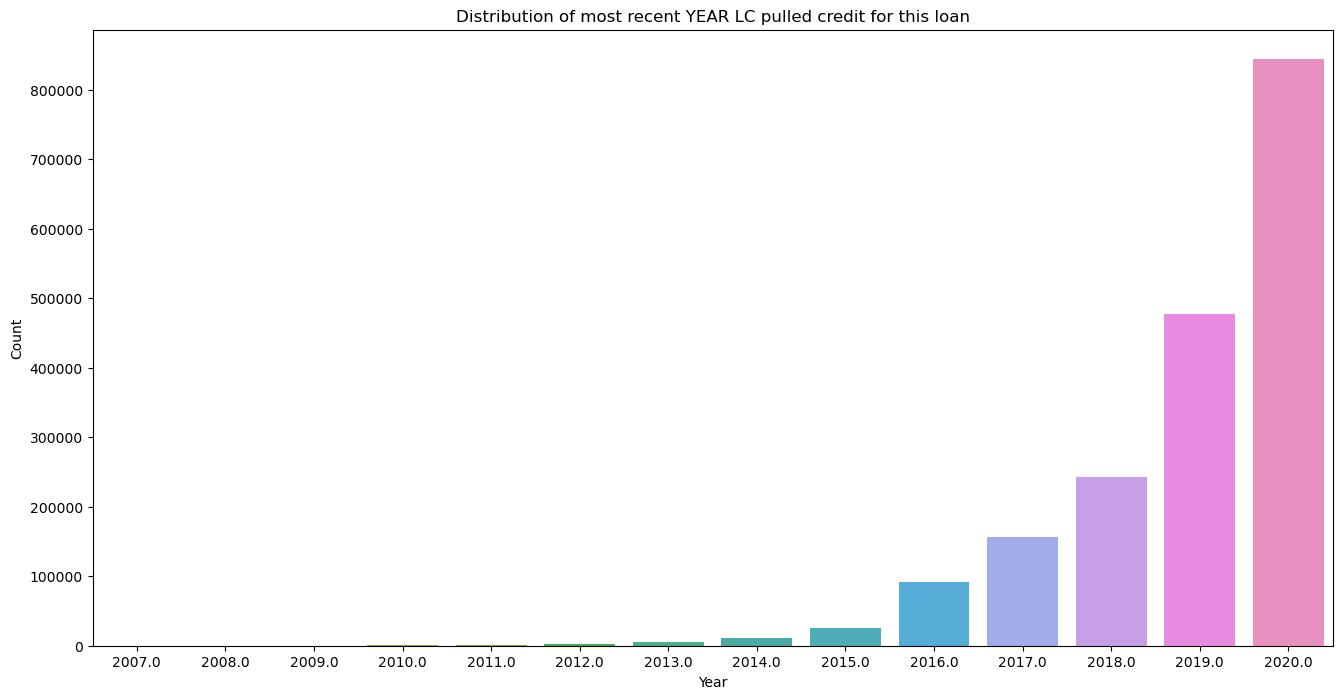

In [89]:
import matplotlib.pyplot as plt
import seaborn

# Assuming droped_filtered_df is already defined
# Convert 'last_credit_pull_d' to a year
loan_status_df = loan_status_df.with_columns(
    pl.col('last_credit_pull_d').str.slice(-4).str.to_integer(base=10, strict=True).alias('last_credit_pull_d')
)

# Group by year and count the occurrences
last_credit_pull_d_counts = loan_status_df.group_by('last_credit_pull_d').agg([
    pl.len().alias('count')
])

# Convert to Pandas DataFrame for plotting
last_credit_pull_d_counts_pd = last_credit_pull_d_counts.to_pandas()

# Create a bar plot
plt.figure(figsize=(16, 8))
seaborn.barplot(x='last_credit_pull_d', y='count', data=last_credit_pull_d_counts_pd)
plt.title('Distribution of most recent YEAR LC pulled credit for this loan')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()



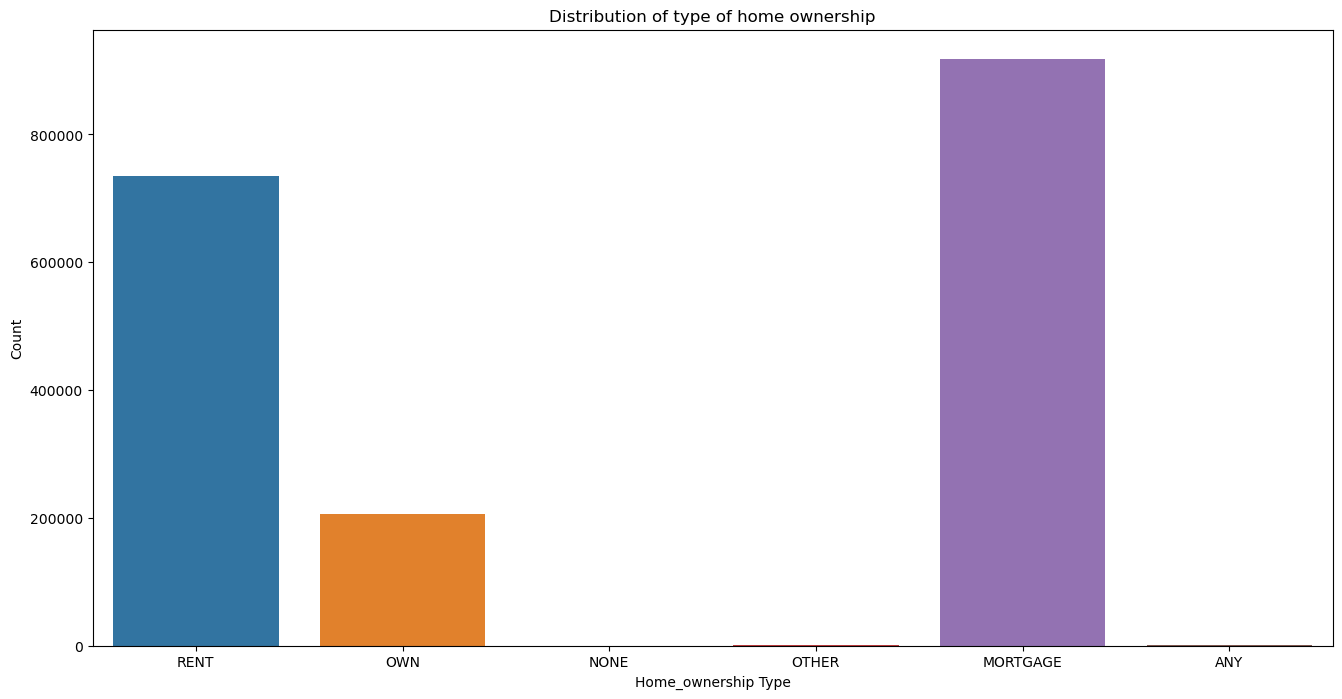

In [90]:
# home_ownership_df
# Assuming home_ownership_df is already defined
home_ownership_df = loan_status_df.with_columns(
    pl.col('home_ownership')
)

# Group by home_ownership and count the occurrences
home_ownership_df_counts = home_ownership_df.group_by('home_ownership').agg([
    pl.len().alias('count')
])

# Convert to Pandas DataFrame for plotting
home_ownership_df_counts_pd = home_ownership_df_counts.to_pandas()

# Create a bar plot
plt.figure(figsize=(16, 8))
seaborn.barplot(x='home_ownership', y='count', data=home_ownership_df_counts_pd)
plt.title('Distribution of type of home ownership')
plt.xlabel('Home_ownership Type')
plt.ylabel('Count')
plt.show()

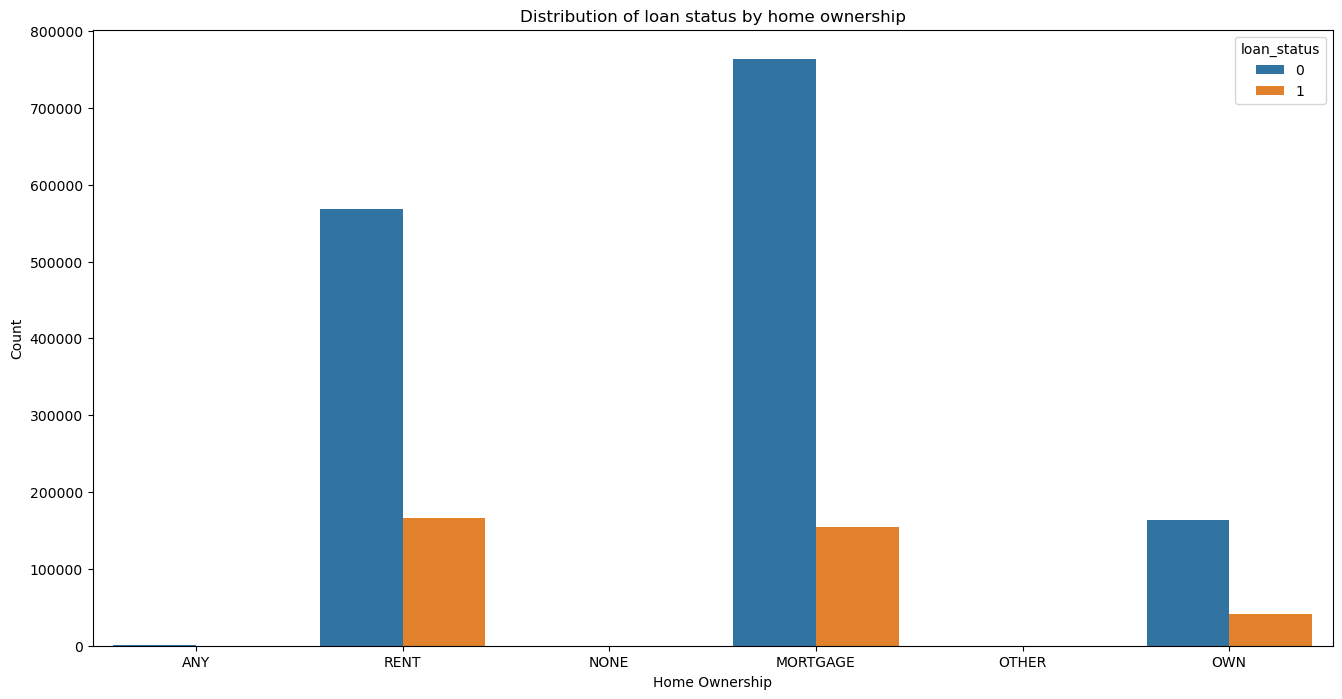

In [91]:
# home_ownership_df

# Assuming home_ownership_df is already defined
# classify correlation of home_ownership with loan_status
home_ownership_loan_status = home_ownership_df.group_by(['home_ownership', 'loan_status']).agg([
    pl.len().alias('count')
])

# Convert to Pandas DataFrame for plotting
home_ownership_loan_status_pd = home_ownership_loan_status.to_pandas()

# Create a bar plot
plt.figure(figsize=(16, 8))
seaborn.barplot(x='home_ownership', y='count', hue='loan_status', data=home_ownership_loan_status_pd)
plt.title('Distribution of loan status by home ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()


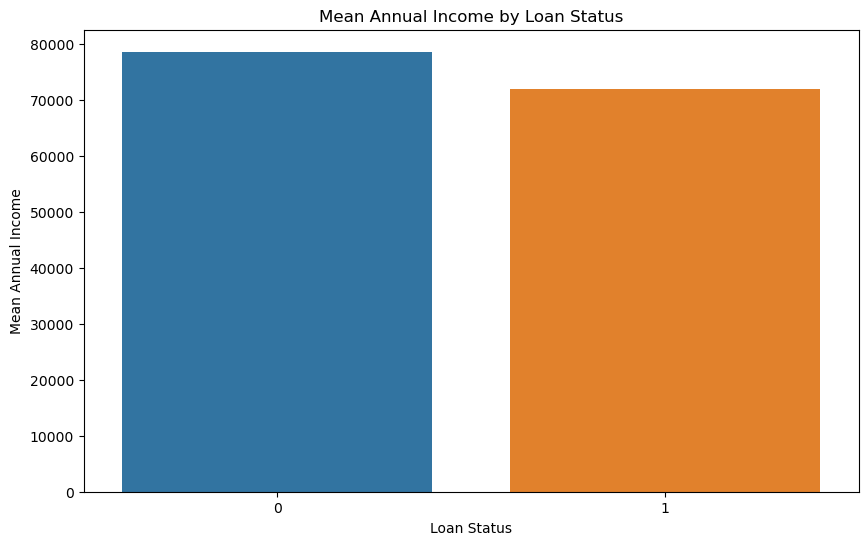

In [92]:
# explore the relationship between 'loan_status' and 'annual_inc' and 'dti' and 'funded_amnt'
# Assuming loan_status_df is already defined
# Convert 'annual_inc' to float

# Group by 'loan_status' and calculate the mean of 'annual_inc'
annual_inc_loan_status = loan_status_df.group_by('loan_status').agg([
    pl.mean('annual_inc').alias('mean_annual_inc')
])

# Convert to Pandas DataFrame for plotting
annual_inc_loan_status_pd = annual_inc_loan_status.to_pandas()

# Create a bar plot
plt.figure(figsize=(10, 6))
seaborn.barplot(x='loan_status', y='mean_annual_inc', data=annual_inc_loan_status_pd)
plt.title('Mean Annual Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Mean Annual Income')
plt.show()



In [93]:
loan_status_df_pd = loan_status_df.to_pandas()


In [94]:
import pandas as pd

# Convert columns to numeric and handle errors
loan_status_df_pd['dti'] = pd.to_numeric(loan_status_df_pd['dti'], errors='coerce')
loan_status_df_pd['annual_inc'] = pd.to_numeric(loan_status_df_pd['annual_inc'], errors='coerce')
loan_status_df_pd['funded_amnt'] = pd.to_numeric(loan_status_df_pd['funded_amnt'], errors='coerce')


In [95]:
loan_status_df_pd.head()

,,id,loan_amnt,funded_amnt,funded_amnt_inv,term,emp_title,emp_length,home_ownership,annual_inc,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000,5000,4975.0,36,None,10+ years,RENT,24000.0,...,None,None,None,None,None,None,None,None,None,N
1,1,1077430,2500,2500,2500.0,60,Ryder,< 1 year,RENT,30000.0,...,None,None,None,None,None,None,None,None,None,N
2,2,1077175,2400,2400,2400.0,36,None,10+ years,RENT,12252.0,...,None,None,None,None,None,None,None,None,None,N
3,3,1076863,10000,10000,10000.0,36,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,None,None,None,None,None,None,None,None,None,N
4,4,1075358,3000,3000,3000.0,60,University Medical Group,1 year,RENT,80000.0,...,None,None,None,None,None,None,None,None,None,N


In [96]:
# Encode categorical variables
loan_status_df_pd = pd.get_dummies(loan_status_df_pd, columns=['home_ownership'], drop_first=True)

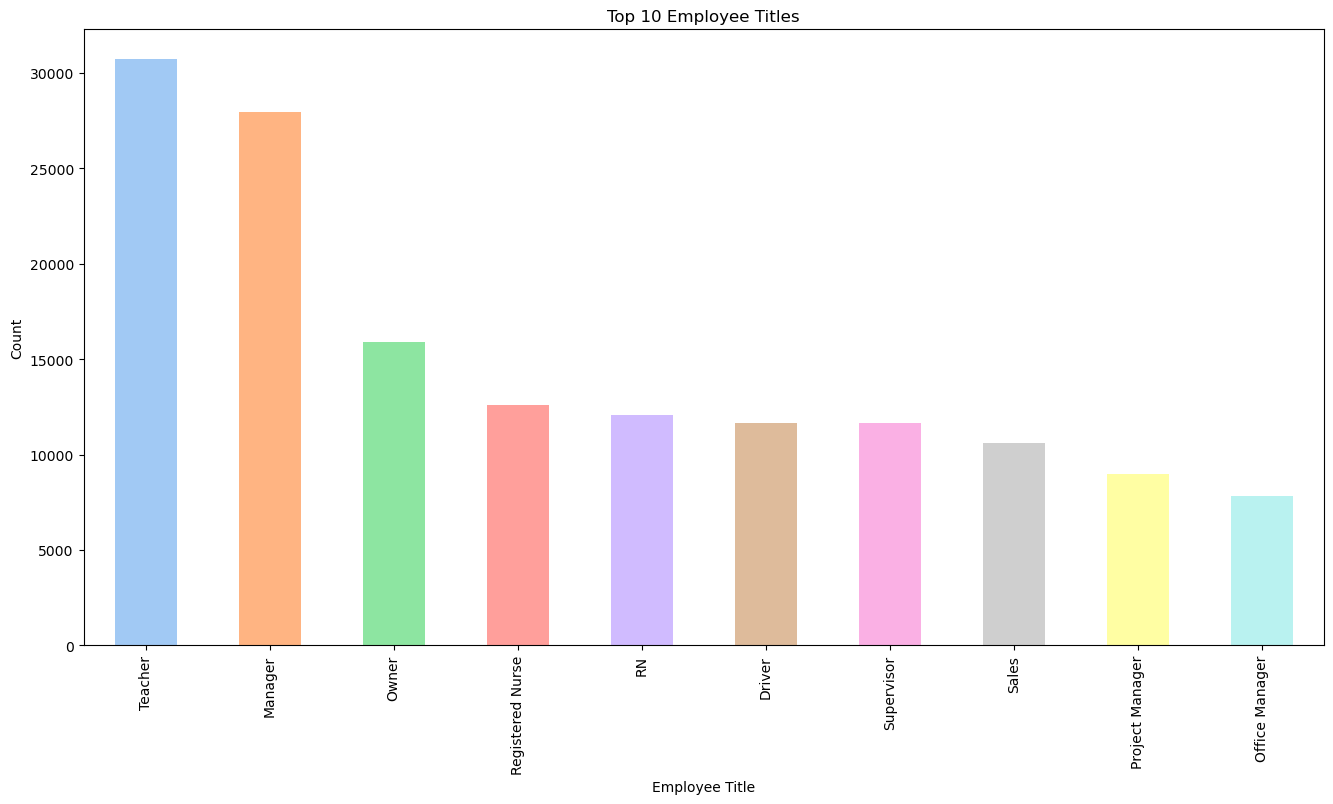

In [97]:
# draw distribution of emp_title
import matplotlib.pyplot as plt

# Assuming loan_status_df_pd is already defined
# Group by 'emp_title' and count the occurrences
emp_title_counts = loan_status_df_pd['emp_title'].value_counts()

# Create a bar plot
plt.figure(figsize=(16, 8))
emp_title_counts[:10].plot(kind='bar', color=sns.color_palette("pastel"))
plt.title('Top 10 Employee Titles')
plt.xlabel('Employee Title')
plt.ylabel('Count')
plt.show()



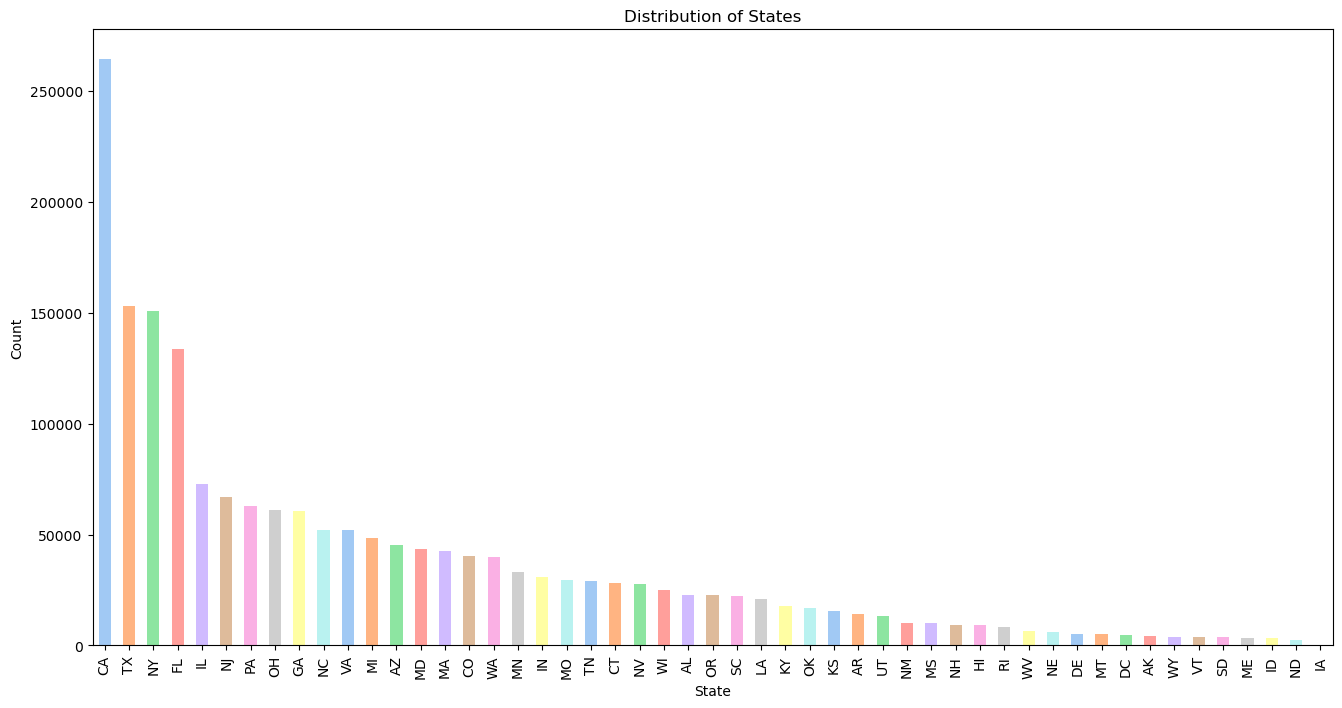

In [98]:

# loan_status_df_pd.correlation_matrix()

# draw distribution of State
import matplotlib.pyplot as plt

# Assuming loan_status_df_pd is already defined
# Group by 'addr_state' and count the occurrences
addr_state_counts = loan_status_df_pd['addr_state'].value_counts()

# Create a bar plot
plt.figure(figsize=(16, 8))
addr_state_counts.plot(kind='bar', color=sns.color_palette("pastel"))
plt.title('Distribution of States')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()


In [99]:
print(loan_status_df_pd.keys())

Index(['', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'emp_title', 'emp_length', 'annual_inc', 'verification_status',
       ...
       'hardship_loan_status', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT'],
      dtype='object', length=131)


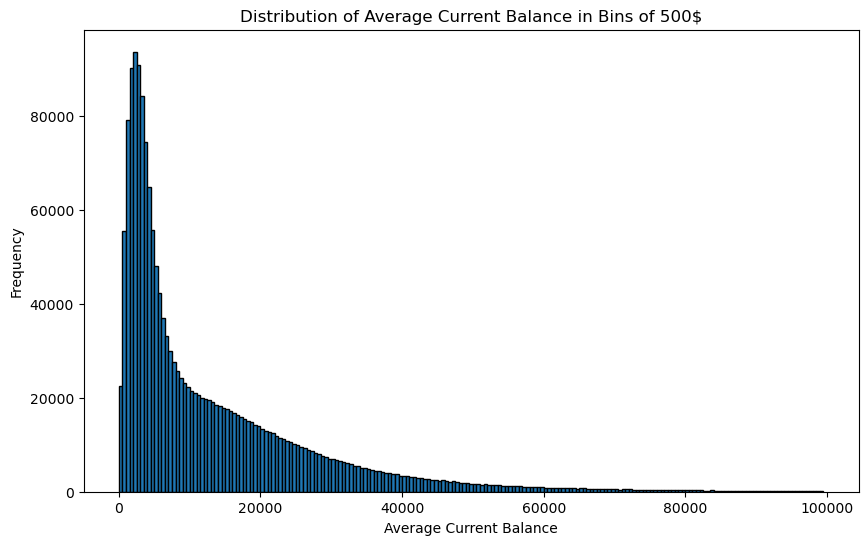

In [100]:
# find "avg_cur_bal" distribution histogram
import matplotlib.pyplot as plt

# Assuming loan_status_df_pd is already defined
# Convert 'avg_cur_bal' to float
loan_status_df_pd['avg_cur_bal'] = pd.to_numeric(loan_status_df_pd['avg_cur_bal'], errors='coerce')

# Drop missing values
avg_cur_bal_df = loan_status_df_pd.dropna(subset=['avg_cur_bal'])

# print all values of 'avg_cur_bal'
# group the values into bins of 1000
plt.figure(figsize=(10, 6))
plt.hist(avg_cur_bal_df['avg_cur_bal'], bins=range(0, 100000, 500), edgecolor='k')

plt.title('Distribution of Average Current Balance in Bins of 500$')
plt.xlabel('Average Current Balance')
plt.ylabel('Frequency')
plt.show()



In [101]:
loan_status_df_pd.keys()

Index(['', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'emp_title', 'emp_length', 'annual_inc', 'verification_status',
       ...
       'hardship_loan_status', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT'],
      dtype='object', length=131)

## 3. I chosen HistGradientBoostingClassifier
### approaches and implement classifier:
###  evaluate my model

In [102]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming filtered_df_pd is your DataFrame
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

employee_filtered_df_pd = loan_status_df_pd.dropna(subset=['emp_title'])

# Fit and transform the emp_title column
employee_filtered_df_pd['emp_title_encoded'] = label_encoder.fit_transform(employee_filtered_df_pd['emp_title'])



/var/folders/3m/b4z1pdpx2m39l50_y1phxpkr0000gn/T/ipykernel_44750/3985973704.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employee_filtered_df_pd['emp_title_encoded'] = label_encoder.fit_transform(employee_filtered_df_pd['emp_title'])


In [104]:

# Keep only the specified columns
employee_filtered_df_pd_clean = employee_filtered_df_pd[['loan_status', 'emp_title_encoded', 'funded_amnt', 'annual_inc', 'dti', 'avg_cur_bal', 'home_ownership_RENT', 'home_ownership_OWN', 'home_ownership_MORTGAGE']]


In [105]:
# show all emp_title_encoded values
employee_filtered_df_pd_clean['emp_title_encoded'].value_counts()

# display all values of emp_title_encoded
# employee_filtered_df_pd_clean['emp_title_encoded'].unique()

# keep only the top 200 values of emp_title_encoded
top_emp_title_encoded = employee_filtered_df_pd_clean['emp_title_encoded'].value_counts().index[:200]
employee_filtered_df_pd_clean = employee_filtered_df_pd_clean[employee_filtered_df_pd_clean['emp_title_encoded'].isin(top_emp_title_encoded)]

# display all values of emp_title_encoded
employee_filtered_df_pd_clean['emp_title_encoded'].unique()


array([ 16260, 115663, 274730, 355914, 359623, 221952, 311211, 413805,
       290171, 245043,  33192, 190223, 320652, 112410, 289502,  28756,
       211418,  13438, 306692, 150467, 385159, 125170, 130019, 317794,
       264418,  59953,  14184, 428533,  85690, 314661, 100136,   9944,
       282693, 108653, 372921, 122484, 305673, 103075, 445295,   9439,
       362786, 268176, 429881, 351220, 452858, 330574,  43585, 211165,
       330468, 390205, 220814,  82694, 305674,  49450, 272879, 449528,
       197821,  48283,  26932, 217587, 351221, 434620, 449001, 138405,
       287525, 271846, 312921,   9330, 407327, 129645,  38614, 143597,
        32658, 323883, 348101, 264232,  90005,  19947, 254244, 290172,
       260292, 261460, 241853,  54973,  70441, 306432, 290670, 113105,
       172310,  57932, 433404, 350690, 275281, 267084, 273461,  22745,
       261298, 373088, 138513, 306047, 442793, 245660, 376631, 158280,
       359624, 360544, 205355, 319592,  47610, 242706, 450586, 311868,
      

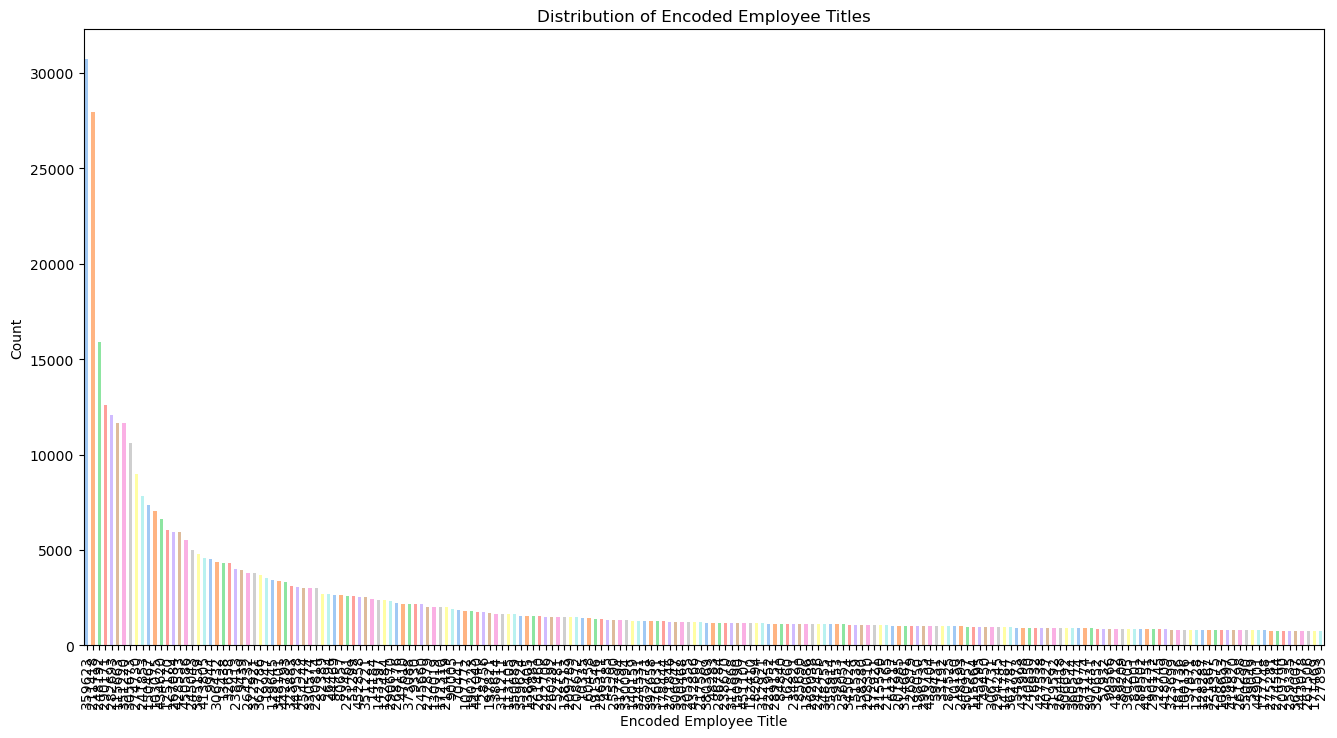

In [106]:
# draw distribution of emp_title_encoded
import matplotlib.pyplot as plt

# Assuming employee_filtered_df_pd_clean is already defined
# Group by 'emp_title_encoded' and count the occurrences
emp_title_encoded_counts = employee_filtered_df_pd_clean['emp_title_encoded'].value_counts()

# Create a bar plot
plt.figure(figsize=(16, 8))
emp_title_encoded_counts.plot(kind='bar', color=sns.color_palette("pastel"))
plt.title('Distribution of Encoded Employee Titles')
plt.xlabel('Encoded Employee Title')
plt.ylabel('Count')
plt.show()

In [107]:
employee_filtered_df_pd_clean.head()

,loan_status,emp_title_encoded,funded_amnt,annual_inc,dti,avg_cur_bal,home_ownership_RENT,home_ownership_OWN,home_ownership_MORTGAGE
3612,0,16260,24000,94000.0,17.80,NaN,False,False,True
5356,0,115663,3450,14000.0,16.71,NaN,True,False,False
39786,0,274730,12000,60000.0,4.62,476.0,True,False,False
39789,0,355914,12000,96500.0,12.61,11783.0,False,False,True
39797,0,359623,11100,90000.0,3.73,39267.0,False,False,True


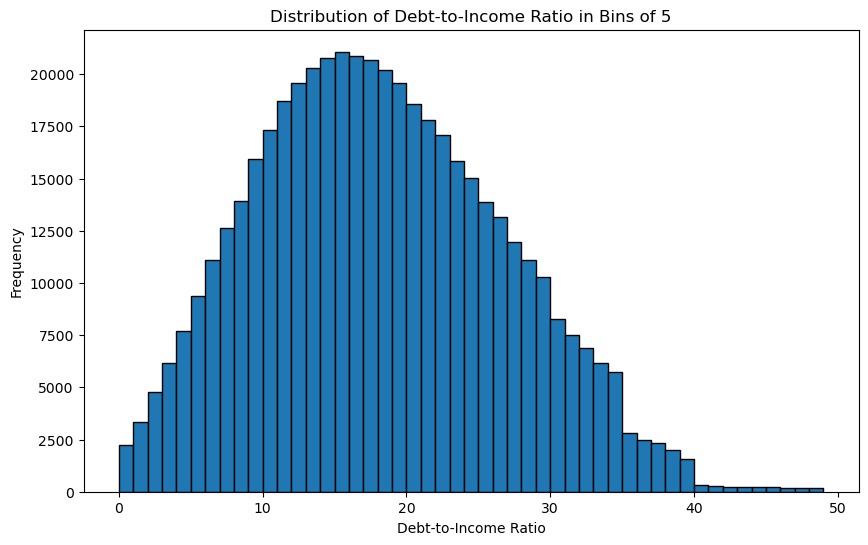

In [108]:
# group 'dti' by bins of 1000, show the distribution

import matplotlib.pyplot as plt

# group the values into bins of 1000
plt.figure(figsize=(10, 6))
plt.hist(employee_filtered_df_pd_clean['dti'], bins=range(0, 50, 1), edgecolor='k')

plt.title('Distribution of Debt-to-Income Ratio in Bins of 5')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.show()


In [111]:
employee_filtered_df_pd_clean.head()

,loan_status,emp_title_encoded,funded_amnt,annual_inc,dti,avg_cur_bal,home_ownership_RENT,home_ownership_OWN,home_ownership_MORTGAGE
3612,0,16260,24000,94000.0,17.80,NaN,False,False,True
5356,0,115663,3450,14000.0,16.71,NaN,True,False,False
39786,0,274730,12000,60000.0,4.62,476.0,True,False,False
39789,0,355914,12000,96500.0,12.61,11783.0,False,False,True
39797,0,359623,11100,90000.0,3.73,39267.0,False,False,True


In [112]:
# Split the dataset into features and target variable
X = employee_filtered_df_pd_clean.drop('loan_status', axis=1)
y = employee_filtered_df_pd_clean['loan_status']

In [113]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [114]:

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the Logistic Regression model
model = HistGradientBoostingClassifier()
trainning_result = model.fit(X_train, y_train)

In [115]:

# Make predictions
y_pred = model.predict(X_test)


In [116]:
trainning_result.score(X, y)

0.8066001998168346

In [118]:

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[77499    36]
 [18489    64]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89     77535
           1       0.64      0.00      0.01     18553

    accuracy                           0.81     96088
   macro avg       0.72      0.50      0.45     96088
weighted avg       0.78      0.81      0.72     96088

